# 1. Imports

In [370]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Dados

## 2.1. Import

In [371]:
root_path = os.path.abspath('..')
data_path = os.path.join(root_path, 'notebooks')
extra_medidas_path = os.path.join(root_path, 'extra', 'medidas_governamentais')

In [372]:
noticias_filename = 'noticias_en_classification.csv'
tweets_filename = 'tweets_en_classification.csv'
medidas_filename = 'medidas_governamentais.csv'

In [373]:
noticias_path = os.path.join(data_path, noticias_filename)
tweets_path = os.path.join(data_path, tweets_filename)
medidas_path = os.path.join(extra_medidas_path, medidas_filename)

In [374]:
noticias = pd.read_csv(noticias_path, index_col='Unnamed: 0')

In [375]:
tweets = pd.read_csv(tweets_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')

In [376]:
medidas = pd.read_csv(medidas_path)

## 2.2. Cleaning

### 2.2.1. NaNs

#### 2.2.1.1 Notícias

In [377]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37593 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37593 non-null  object 
 1   titulo                    37593 non-null  object 
 2   descricao                 37241 non-null  object 
 3   source                    37593 non-null  object 
 4   titulo_clean              37592 non-null  object 
 5   titulo_en                 37592 non-null  object 
 6   classification            37593 non-null  object 
 7   score                     37593 non-null  float64
 8   descricao_clean           37221 non-null  object 
 9   descricao_en              37221 non-null  object 
 10  descricao_classification  37593 non-null  object 
 11  descricao_score           37593 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


In [378]:
index_descricao_null = noticias[noticias.descricao.isnull().values].index

In [379]:
noticias[noticias.descricao.isnull().values].source.value_counts()

publico    352
Name: source, dtype: int64

In [380]:
index_titulo_clean_null = noticias[noticias.titulo_clean.isnull().values].index

In [381]:
noticias[noticias.titulo_clean.isnull().values].source.value_counts()

observador    1
Name: source, dtype: int64

In [382]:
index_descricao_clean_null = noticias[noticias.descricao_clean.isnull().values].index

In [383]:
noticias[noticias.descricao_clean.isnull().values].source.value_counts()

publico    372
Name: source, dtype: int64

In [384]:
noticias.titulo[index_titulo_clean_null].values

array([' '], dtype=object)

In [385]:
# lets get the descricao_clean that have descricao not null
index_descricao_clean_null_weird = set(index_descricao_clean_null) - set(index_descricao_null)

In [386]:
noticias.descricao[index_descricao_clean_null_weird].values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)

***
Time to remove these NaNs classifications...
***

In [387]:
noticias.loc[index_titulo_clean_null, 'classification'] = np.nan

In [388]:
noticias.loc[index_titulo_clean_null, 'score'] = np.nan

In [389]:
noticias.loc[index_descricao_clean_null, 'descricao_classification'] = np.nan

In [390]:
noticias.loc[index_descricao_clean_null, 'descricao_score'] = np.nan

***
Now lets get rid of them
***

In [391]:
noticias = noticias.dropna()

In [392]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37220 entries, 0 to 37592
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   data                      37220 non-null  object 
 1   titulo                    37220 non-null  object 
 2   descricao                 37220 non-null  object 
 3   source                    37220 non-null  object 
 4   titulo_clean              37220 non-null  object 
 5   titulo_en                 37220 non-null  object 
 6   classification            37220 non-null  object 
 7   score                     37220 non-null  float64
 8   descricao_clean           37220 non-null  object 
 9   descricao_en              37220 non-null  object 
 10  descricao_classification  37220 non-null  object 
 11  descricao_score           37220 non-null  float64
dtypes: float64(2), object(10)
memory usage: 3.7+ MB


#### 2.2.1.2. Tweets

In [393]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   hashtag         4830 non-null   object 
 5   geo             1 non-null      object 
 6   text_clean      21140 non-null  object 
 7   text_en         21140 non-null  object 
 8   classification  21140 non-null  object 
 9   score           21140 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [394]:
tweets = tweets.drop(columns=['hashtag', 'geo'])

In [395]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21140 non-null  object 
 1   date            21140 non-null  object 
 2   username        21140 non-null  object 
 3   text            21140 non-null  object 
 4   text_clean      21140 non-null  object 
 5   text_en         21140 non-null  object 
 6   classification  21140 non-null  object 
 7   score           21140 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.5+ MB


### 2.2.2. Converting classification to -1/1

In [396]:
map_dict = {'NEGATIVE': -1, 'POSITIVE': 1}

In [397]:
noticias.loc[:, 'classification'] = noticias.classification.map(map_dict)
noticias.loc[:, 'descricao_classification'] = noticias.descricao_classification.map(map_dict)
tweets.loc[:, 'classification'] = tweets.classification.map(map_dict)

In [398]:
noticias.classification.value_counts()

-1    27129
 1    10091
Name: classification, dtype: int64

In [399]:
noticias.descricao_classification.value_counts()

-1    28238
 1     8982
Name: descricao_classification, dtype: int64

In [400]:
tweets.classification.value_counts()

-1    15439
 1     5701
Name: classification, dtype: int64

### 2.2.3. Converting dates to datetime objects

In [401]:
noticias['data'] = pd.to_datetime(noticias['data'], errors= "coerce").dt.tz_localize(None)

In [402]:
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [403]:
medidas['data'] = pd.to_datetime(medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)

In [404]:
noticias.data.dtypes # same as datetime64[ns]

dtype('<M8[ns]')

In [405]:
tweets.date.dtypes # same as datetime[ns]

dtype('<M8[ns]')

In [406]:
medidas.data.dtypes # same as datetime[ns]

dtype('<M8[ns]')

# 3. Análise

In [407]:
medidas.groupby(pd.Grouper(key='data', freq='MS')).count()

,local,tipo,desc
data,,,
2020-03-01,32,32,32
2020-04-01,18,18,18
2020-05-01,40,40,40
2020-06-01,17,17,17
2020-07-01,13,13,13


In [408]:
tweets['weighted_classification'] = tweets.classification * tweets.score

In [409]:
noticias['weighted_classification'] = noticias.classification * noticias.score

In [410]:
noticias['weighted_desc_classification'] = noticias.descricao_classification * noticias.descricao_score

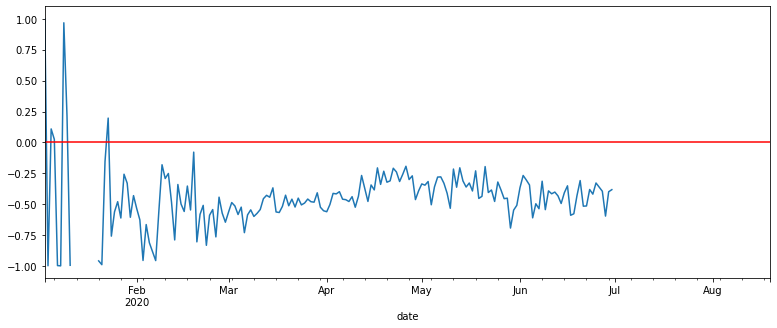

In [411]:
tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

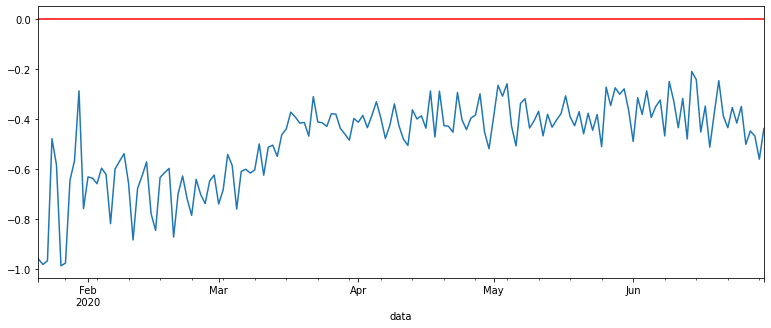

In [412]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

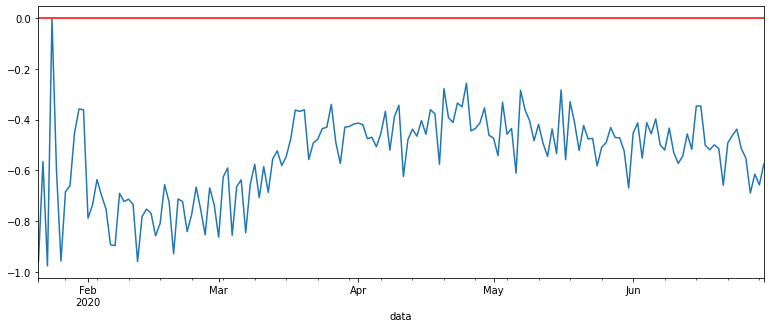

In [413]:
noticias.groupby(pd.Grouper(key='data', freq='D'))['weighted_desc_classification'].mean().plot(figsize=(13,5),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')

In [414]:
def plot_sentiment(df,
                   date_name,
                   classification_name,
                   freq,
                   agg_name='mean',
                   fig_size=(13, 5),
                   plot_type='line',
                   plot_zero_line=False):
    df.groupby(pd.Grouper(key=date_name, freq=freq))[classification_name]\
        .agg(agg_name)\
        .plot(figsize=fig_size, kind=plot_type)
    if plot_zero_line:
        plt.axhline(y=0.0, color='r', linestyle='-')

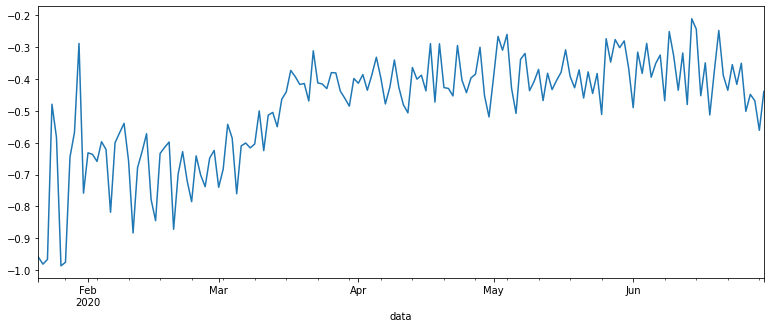

In [415]:
plot_sentiment(noticias, 'data', 'weighted_classification', 'D',)

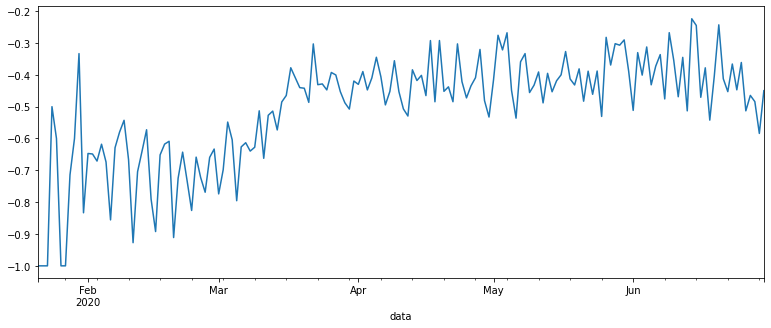

In [416]:
plot_sentiment(noticias, 'data', 'classification', 'D',)

In [417]:
medidas.data.dt.date.unique()[0]

datetime.date(2020, 3, 8)

In [418]:
def get_adjacent_dates_idx(df_date_values, date_to_find):
    if date_to_find in df_date_values:
        idx = np.where(df_date_values == date_to_find)[0][0]
        idx_before = idx - 1
        idx_after = idx + 1
    else:
        idx_before = np.where(df_date_values < date_to_find)[0][-1]
        idx_after = idx_before + 1
    return (idx_before, idx_after)

In [419]:
def group_df(df, key_name, freq_name, clf_name, agg_name, reset_index=True, dropna=True):
    new_df = df.groupby(pd.Grouper(key=key_name, freq=freq_name))[clf_name].agg(agg_name)
    if reset_index:
        new_df = new_df.reset_index()
    if dropna:
        new_df = new_df.dropna()
    return new_df

In [420]:
def get_unique_dates(df, date_name):
    return df[date_name].dt.date.unique()

In [421]:
df_temp = tweets.groupby(pd.Grouper(key='date', freq='D'))['weighted_classification'].agg('mean').reset_index().dropna()
medidas_dates = medidas.data.dt.date.unique()
tweet_dates = df_temp.date.dt.date.values

In [422]:
df_temp = group_df(tweets, 'date', 'D', 'weighted_classification', 'mean')
medidas_dates = get_unique_dates(medidas, 'data')
tweets_dates = get_unique_dates(df_temp, 'date')

In [423]:
def get_sentiment_changes(df_data, df_events, df_data_key, df_events_key, clf_name):
    events_dates = get_unique_dates(df_events, df_events_key)
    data_dates = get_unique_dates(df_data, df_data_key)
    ans_dict = dict()
    for date in events_dates:
        before_idx, after_idx = get_adjacent_dates_idx(data_dates, date)
        before_date = data_dates[before_idx]
        after_date = data_dates[after_idx]
        sentiment_before = df_data[data_dates == before_date][clf_name].values[0]
        sentiment_after = df_data[data_dates == after_date][clf_name].values[0]
        if date in data_dates:
            sentiment_middle = df_data[data_dates == date][clf_name].values
        else:
            sentiment_middle = [np.nan]
        ans_dict[date] = {'before_date': before_date,
                          'before_sentiment': sentiment_before,
                          'middle_date': date,
                          'middle_sentiment': sentiment_middle[0],
                          'after_date': after_date,
                          'after_sentiment': sentiment_after}
    return ans_dict

In [424]:
change_dict = get_sentiment_changes(df_temp, medidas, 'date', 'data', 'weighted_classification')

In [425]:
for date, value in change_dict.items():
    print(date, ':', round(value['before_sentiment'], 2), '->', round(value['middle_sentiment'], 2), '->', round(value['after_sentiment'], 2))

2020-03-08 : -0.59 -> -0.54 -> -0.6
2020-03-12 : -0.54 -> -0.45 -> -0.43
2020-03-13 : -0.45 -> -0.43 -> -0.44
2020-03-14 : -0.43 -> -0.44 -> -0.37
2020-03-15 : -0.44 -> -0.37 -> -0.56
2020-03-16 : -0.37 -> -0.56 -> -0.57
2020-03-17 : -0.56 -> -0.57 -> -0.52
2020-03-18 : -0.57 -> -0.52 -> -0.43
2020-03-19 : -0.52 -> -0.43 -> -0.51
2020-03-22 : -0.46 -> -0.52 -> -0.45
2020-03-23 : -0.52 -> -0.45 -> -0.5
2020-03-26 : -0.49 -> -0.46 -> -0.48
2020-04-02 : -0.56 -> -0.5 -> -0.41
2020-04-03 : -0.5 -> -0.41 -> -0.42
2020-04-09 : -0.48 -> -0.44 -> -0.52
2020-04-17 : -0.38 -> -0.21 -> -0.34
2020-04-30 : -0.46 -> -0.39 -> -0.34
2020-05-03 : -0.35 -> -0.32 -> -0.5
2020-05-04 : -0.32 -> -0.5 -> -0.36
2020-05-07 : -0.28 -> -0.28 -> -0.33
2020-05-15 : -0.31 -> -0.36 -> -0.33
2020-05-18 : -0.39 -> -0.23 -> -0.45
2020-05-30 : -0.69 -> -0.55 -> -0.51
2020-06-01 : -0.51 -> -0.37 -> -0.27
2020-06-09 : -0.31 -> -0.54 -> -0.39
2020-06-15 : -0.49 -> -0.41 -> -0.35
2020-06-23 : -0.51 -> -0.38 -> -0.42
2020-07

***
TODO
- generalizar a mudança para uma média de dias: _FEITO_
- visualizar estas mudanças
- fazer para tweets, títulos e descrições
***

In [426]:
def get_adjacent_date_window_idx(df_date_values, date_to_find, window_size=1):
    window = range(1, window_size+1)
    idx_before = list()
    idx_after = list()
    for pos in window:
        if date_to_find in df_date_values:
            idx = np.where(df_date_values == date_to_find)[0][0]
            idx_before.append(idx - pos)
            idx_after.append(idx + pos)
        else:
            idx_before.append(np.where(df_date_values < date_to_find)[0][-pos])
            idx_after.append(idx_before + pos)
    return (idx_before, idx_after)

In [427]:
df = pd.DataFrame.from_dict(change_dict, orient='index')

In [428]:
df['before_date'] = pd.to_datetime(df['before_date'], errors= "coerce").dt.tz_localize(None)

In [429]:
print(df.before_sentiment.min())
print(df.before_sentiment.max())
print(df.after_sentiment.min())
print(df.after_sentiment.max())
print(df.after_sentiment.max() - df.before_sentiment.min())

-0.6922331161615325
-0.28006157937802767
-0.5981807456047403
0.9940541982650756
1.686287314426608


In [430]:
df['change'] = df.after_sentiment - df.before_sentiment

In [431]:
print(df.change.max())
print(df.change.min())

1.3757164729268927
-0.19935438729969235


In [432]:
y_ticks = list(np.arange(-0.75, -0.25, (-0.25-(-0.75))/9))
print(y_ticks)

[-0.75, -0.6944444444444444, -0.6388888888888888, -0.5833333333333333, -0.5277777777777777, -0.4722222222222221, -0.4166666666666665, -0.36111111111111094, -0.30555555555555536]


In [433]:
# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)

In [434]:
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            print(dates_middle[i])
            print(medidas[medidas['data'] == dates_middle[i]]['desc'].values)
            print()

2020/03/16
['Limites à circulação da fronteira com Espanha, limitando-a à circulação de trabalhadores transfronteiriços e mercadorias'
 'Fecho de todos os estabelecimentos de ensino'
 'Reposto temporariamente o controlo documental na fronteira com Espanha']

2020/05/03
['Decretado Estado de Calamidade']

2020/05/30
['Celebrações comunitárias de cerimónias religiosas com regras a definir entre DGS e confissões religiosas'
 'Reabertura das competições oficiais da Primeira Liga de futebol e da Taça de Portugal']

2020/06/01
['Teletrabalho parcial, com horários desfasados ou equipas em espelho'
 'Abertura de lojas de cidadão'
 'Abertura de lojas com área superior a quatrocentos metros quadrados ou inseridas em centros comerciais'
 'Abertura de creches, pré-escolar e ATLs'
 'Abertura de cinemas, teatros, auditórios e salas de espectáculos, com lugares marcados, lotação reduzida e distanciamento físico']



In [435]:
import textwrap

In [436]:
def wrap_text(text_block, wrap_len):
    new_textlines = list()
    for textline in ['- ' + desc for desc in text_block]:
        if len(textline) < wrap_len:
            new_textlines.append(textline)
        else:
            temptext_list = textline.split(' ')
            temptext_len = np.array([len(word)+1 for word in temptext_list])
            temptext_cumulative = np.cumsum(temptext_len)
            idx = np.where(temptext_cumulative > wrap_len)[0][0]-1
            new_textlines.append(' '.join(temptext_list[:idx]))
            new_textlines.append('  ' + ' '.join(temptext_list[idx:]))
    return new_textlines

In [437]:
wrap_text(medidas[medidas['data'] == dates_middle[2]]['desc'].values, 50)

['- Decretado o Estado de Alerta',
 '- Governo Regional da Madeira ordenou a',
 '  cessação de todos os voos entre a região e países onde há transmissão ativa de Covid-19, com a exceção do território nacional',
 '- Interditado desembarque de passageiros',
 '  e tripulações dos navios de cruzeiro',
 '- Proibição de eventos em recintos cobertos',
 '  com mais de 1000 pessoas',
 '- Proibição de eventos em ao ar livre com mais',
 '  de 5000 pessoas',
 '- Encerramento de estabelecimentos de',
 '  restauração e bebidas com salas ou espaços de dança']

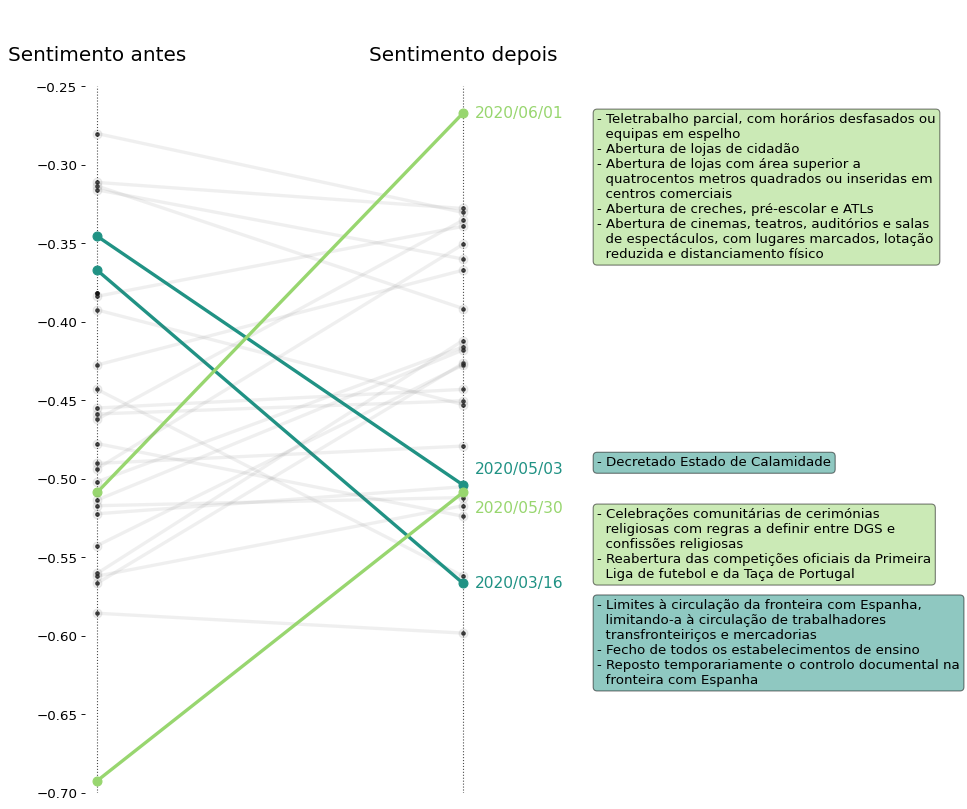

In [438]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25]

axis_left_pos = 1
axis_right_pos = 4

wrap_len = 50

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p2[0]], 
                      [p1[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(12,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.25, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.25, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            newline([axis_left_pos, p[0]], [axis_right_pos, p[1]])
            
            medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
            medidas_text = [line for sentence in medidas_text for line in sentence]
            medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
            box_text = '\n'.join(medidas_text)
            
            if(p[1]-p[0] > 0):
                if(dates_middle[i] == '2020/05/30'):
                    ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]-0.01, box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
            else:
                if(dates_middle[i] == '2020/05/03'):
                    ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+1.1, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            newline([axis_left_pos, p[0]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.23, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})
ax.text(axis_right_pos, -0.23, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.2))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('medidas_tweets_antes_depois.jpeg', bbox_inches='tight', pad_inches=1)

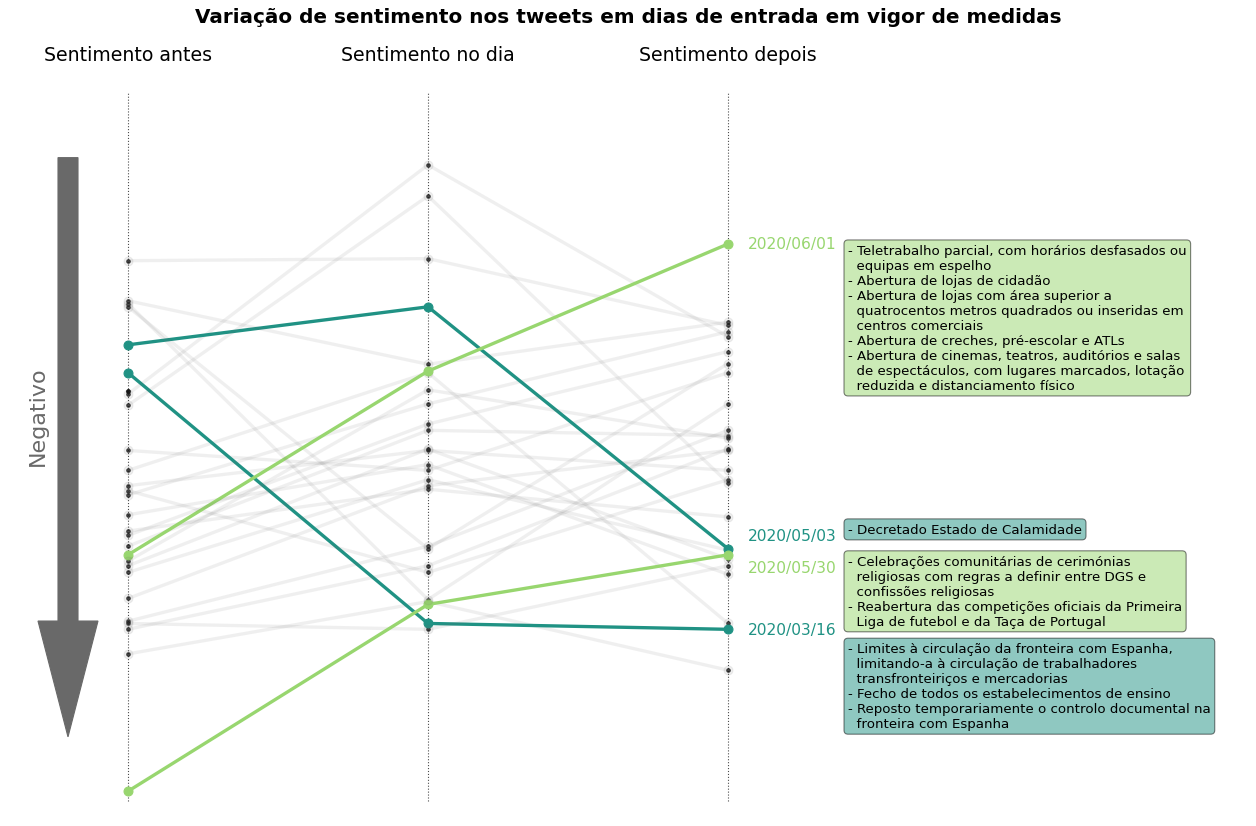

In [441]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15]

axis_left_pos = 1
axis_right_pos = 4
axis_middle_pos = np.mean([axis_left_pos, axis_right_pos])

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p12, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p12[0], p2[0]], 
                      [p1[-1], p12[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_middle_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['middle_sentiment'],
           x=np.repeat(axis_middle_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'], df['middle_sentiment'])):
    if (i < dates_size-2):
        if(abs(p[1]-p[0]) > 0.15):
            newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]])
            
            medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
            medidas_text = [line for sentence in medidas_text for line in sentence]
            medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
            box_text = '\n'.join(medidas_text)
            
            if(p[1]-p[0] > 0):
                if(dates_middle[i] == '2020/05/30'):
                    ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+0.6, p[1], box_text, fontsize=12, verticalalignment='top', bbox=props, wrap=True)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                    props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                    ax.text(axis_right_pos+0.6, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
            else:
                if(dates_middle[i] == '2020/05/03'):
                    ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+0.6, p[1]+0.01, box_text,fontsize=12, verticalalignment='bottom', bbox=props)
                else:
                    ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                    
                    props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                    ax.text(axis_right_pos+0.6, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.12, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':17})
ax.text(axis_middle_pos, -0.12, 'Sentimento no dia', horizontalalignment='center', verticalalignment='center', fontdict={'size':17})
ax.text(axis_right_pos, -0.12, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':17})

# Arrow scale
arrow_neg = patches.Arrow(x=0.7, y=-0.2, dx=0, dy=-0.45, width=0.5, alpha=1, color=c[0])
ax.add_patch(arrow_neg)
ax.text(0.55, -0.4,
        'Negativo', color=c[0],
        horizontalalignment='center', verticalalignment='center',
        fontdict={'size':20}, rotation=90)

# Decoration
ax.set(xlim=(0.4, 6.6), ylim=(-0.71, -0.1))
ax.set_xticks([])
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
title_font = {'fontsize': 18,
              'fontweight' : 600,
              'horizontalalignment': 'center'}
plt.title('Variação de sentimento nos tweets em dias de entrada em vigor de medidas', fontdict=title_font)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('medidas_tweets_antes_durante_depois_com_titulo.png', dpi=200, bbox_inches='tight', pad_inches=1)

In [443]:
df_temp = group_df(noticias, 'data', 'D', 'weighted_classification', 'mean')

In [444]:
medidas.tail(15)

,data,local,tipo,desc
105,2020-06-23,AML,Medidas,Proibida a venda de bebidas alcoólicas nas áre...
106,2020-06-23,AML,Medidas,Proibido o consumo de bebidas alcoólicas ao ar...
107,2020-07-01,Portugal,Alerta,Decretada situação de Alerta em todo o país ex...
108,2020-07-01,AML,Contigência,Situação de Contigência na AML excepto em 19 f...
109,2020-07-01,AML,Calamidade,Situação de Calamidade em todas as freguesias ...
110,2020-07-01,AML,Calamidade,Situação de Calamidade em todas as freguesias ...
111,2020-07-01,AML,Calamidade,Situação de Calamidade em seis das onze fregue...
112,2020-07-01,AML,Calamidade,Situação de Calamidade em duas das dez fregues...
113,2020-07-01,AML,Calamidade,Situação de Calamidade numa das vinte e quatro...
114,2020-07-01,Portugal,Medidas,Limite de ajuntamentos até 20 pessoas


In [445]:
medidas = medidas.iloc[:107,:]

In [446]:
def get_sentiment_changes(df_data, df_events, df_data_key, df_events_key, clf_name):
    events_dates = get_unique_dates(df_events, df_events_key)
    data_dates = get_unique_dates(df_data, df_data_key)
    ans_dict = dict()
    for date in events_dates:
        before_idx, after_idx = get_adjacent_dates_idx(data_dates, date)
        before_date = data_dates[before_idx]
        after_date = data_dates[after_idx]
        sentiment_before = df_data[data_dates == before_date][clf_name].values[0]
        sentiment_after = df_data[data_dates == after_date][clf_name].values[0]
        if date in data_dates:
            sentiment_middle = df_data[data_dates == date][clf_name].values
        else:
            sentiment_middle = [np.nan]
        ans_dict[date] = {'before_date': before_date,
                          'before_sentiment': sentiment_before,
                          'middle_date': date,
                          'middle_sentiment': sentiment_middle[0],
                          'after_date': after_date,
                          'after_sentiment': sentiment_after}
    return ans_dict

In [447]:
change_dict = get_sentiment_changes(df_temp, medidas, 'data', 'data', 'weighted_classification')

In [448]:
df = pd.DataFrame.from_dict(change_dict, orient='index')

In [449]:
df['before_date'] = pd.to_datetime(df['before_date'], errors= "coerce").dt.tz_localize(None)

In [450]:
df['change'] = df.after_sentiment - df.before_sentiment

In [451]:
print(df.before_sentiment.min())
print(df.before_sentiment.max())
print(df.after_sentiment.min())
print(df.after_sentiment.max())


-0.6249617184533013
-0.21046659750724905
-0.6040999994558447
-0.2596718419272945


In [452]:
# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)

In [453]:
dates_top = ['2020/05/07', '2020/06/09', '2020/06/15', '2020/05/04']

In [454]:
df[df.change > 0].sort_values(by='change')

,before_date,before_sentiment,middle_date,middle_sentiment,after_date,after_sentiment,change
2020-05-03,2020-05-02,-0.265958,2020-05-03,-0.309248,2020-05-04,-0.259672,0.006286
2020-06-23,2020-06-22,-0.435148,2020-06-23,-0.354583,2020-06-24,-0.416684,0.018464
2020-03-14,2020-03-13,-0.504801,2020-03-14,-0.549853,2020-03-15,-0.463606,0.041195
2020-03-17,2020-03-16,-0.440346,2020-03-17,-0.372805,2020-03-18,-0.392572,0.047774
2020-03-26,2020-03-25,-0.430004,2020-03-26,-0.379762,2020-03-27,-0.380608,0.049396
2020-06-01,2020-05-31,-0.366430,2020-06-01,-0.489756,2020-06-02,-0.315331,0.051099
2020-05-15,2020-05-14,-0.433166,2020-05-15,-0.404129,2020-05-16,-0.378692,0.054474
2020-03-22,2020-03-21,-0.468858,2020-03-22,-0.311205,2020-03-23,-0.412034,0.056824
2020-04-30,2020-04-29,-0.452011,2020-04-30,-0.519036,2020-05-01,-0.395173,0.056838
2020-03-16,2020-03-15,-0.463606,2020-03-16,-0.440346,2020-03-17,-0.372805,0.090800


In [455]:
df[df.change < 0].sort_values(by='change')

,before_date,before_sentiment,middle_date,middle_sentiment,after_date,after_sentiment,change
2020-06-15,2020-06-14,-0.210467,2020-06-15,-0.242980,2020-06-16,-0.452337,-0.241870
2020-05-04,2020-05-03,-0.309248,2020-05-04,-0.259672,2020-05-05,-0.428834,-0.119586
2020-05-18,2020-05-17,-0.308050,2020-05-18,-0.391487,2020-05-19,-0.427353,-0.119304
2020-03-23,2020-03-22,-0.311205,2020-03-23,-0.412034,2020-03-24,-0.415501,-0.104296
2020-05-30,2020-05-29,-0.301305,2020-05-30,-0.280036,2020-05-31,-0.366430,-0.065124
2020-03-18,2020-03-17,-0.372805,2020-03-18,-0.392572,2020-03-19,-0.416794,-0.043988
2020-03-13,2020-03-12,-0.513431,2020-03-13,-0.504801,2020-03-14,-0.549853,-0.036422
2020-04-17,2020-04-16,-0.437039,2020-04-17,-0.288554,2020-04-18,-0.472340,-0.035301
2020-04-02,2020-04-01,-0.413097,2020-04-02,-0.385928,2020-04-03,-0.435068,-0.021971
2020-03-19,2020-03-18,-0.392572,2020-03-19,-0.416794,2020-03-20,-0.413982,-0.021410


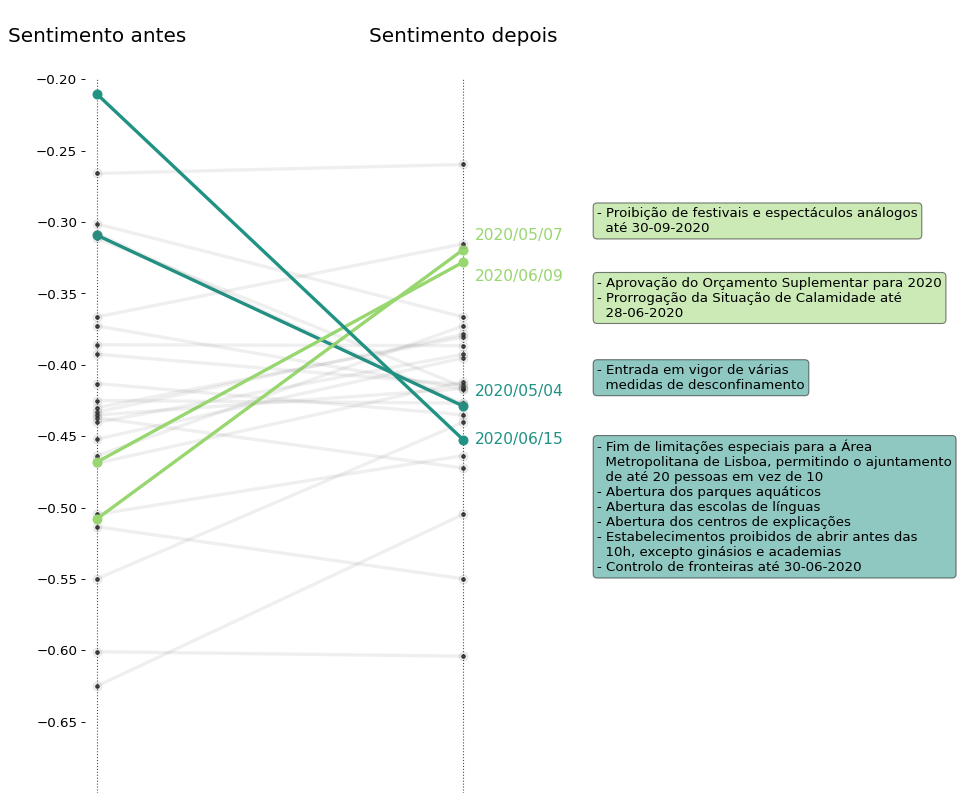

In [456]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2]

axis_left_pos = 1
axis_right_pos = 4

wrap_len = 50

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p2[0]], 
                      [p1[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(12,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.2, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'])):
    if(dates_middle[i] in dates_top):
        newline([axis_left_pos, p[0]], [axis_right_pos, p[1]])
            
        medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
        medidas_text = [line for sentence in medidas_text for line in sentence]
        medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
        box_text = '\n'.join(medidas_text)
            
        if(p[1]-p[0] > 0):
            if(dates_middle[i] == '2020/05/07'):
                ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]+0.03, box_text, fontsize=12, verticalalignment='top', bbox=props)
            else:
                ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            if(dates_middle[i] == '2020/05/04'):
                ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1]+0.01, '- Entrada em vigor de várias\n  medidas de desconfinamento', fontsize=12, verticalalignment='bottom', bbox=props)
            else:
                ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+1.1, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
    else:
        newline([axis_left_pos, p[0]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.17, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})
ax.text(axis_right_pos, -0.17, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':18})

# Decoration
ax.set(xlim=(0.9, 7), ylim=(-0.7, -0.15))
ax.set_xticks([])
plt.yticks(y_ticks, fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('medidas_noticias_antes_depois.jpeg', bbox_inches='tight', pad_inches=1)

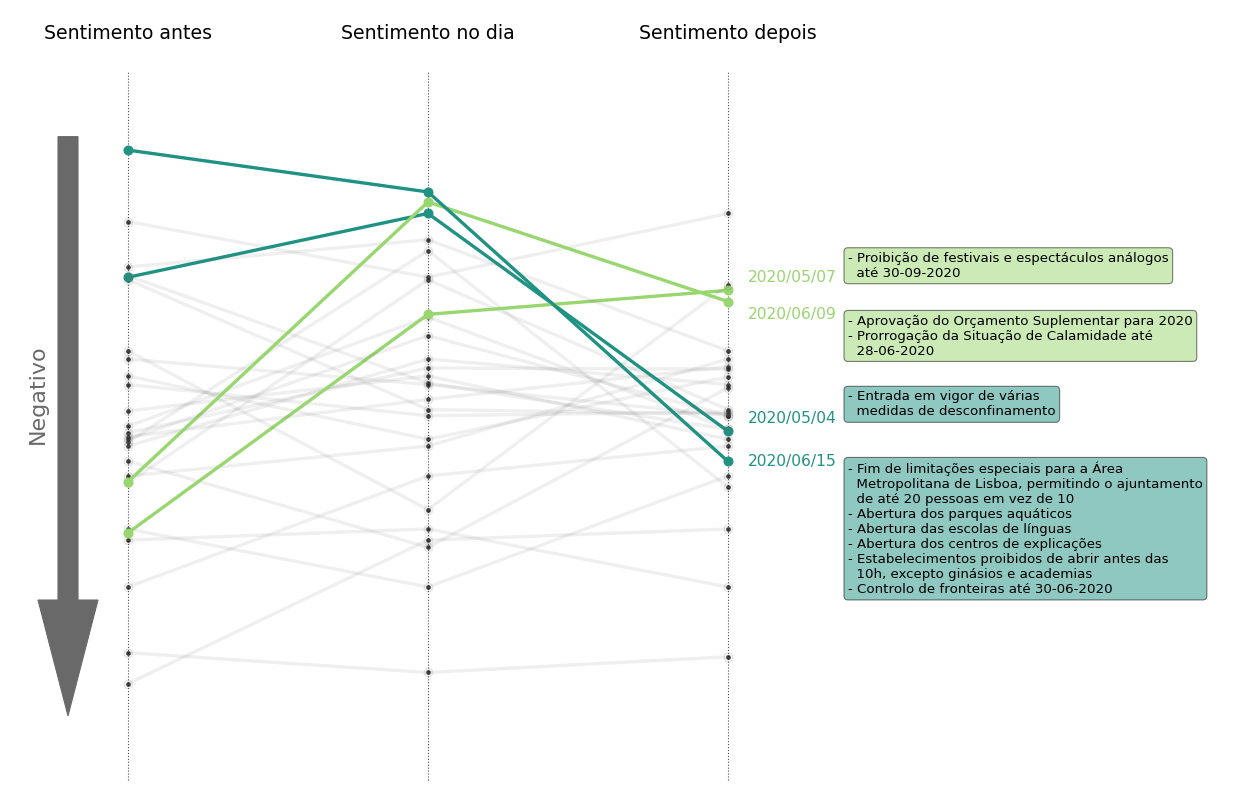

In [467]:
import matplotlib.lines as mlines

# colors
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

# cols
sentiment_cols = ['before_sentiment', 'middle_sentiment', 'after_sentiment']
date_cols = ['before_date', 'middle_date', 'after_date']

# Date arrays
dates_middle = [date.strftime('%Y/%m/%d') for date in df['middle_date']]

dates_size = len(dates_middle)
y_ticks = [-0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35, -0.3, -0.25, -0.2, -0.15]

axis_left_pos = 1
axis_right_pos = 4
axis_middle_pos = np.mean([axis_left_pos, axis_right_pos])

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p12, p2, color=True):
    ax = plt.gca()
    colorize = c[0]
    alpha = 0.1
    
    if color:
        alpha = 1
        if p1[-1]-p2[-1] > 0:
            colorize = c[1]
        else:
            colorize = c[3]
    
    l = mlines.Line2D([p1[0], p12[0], p2[0]], 
                      [p1[-1], p12[-1], p2[-1]], 
                      color=colorize, 
                      alpha=alpha,
                      marker='o',
                      markersize=8,
                      linewidth=3)
    
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,13), dpi= 80)

# Vertical Lines
ax.vlines(x=axis_left_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_middle_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=axis_right_pos, ymin=-0.7, ymax=-0.15, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['before_sentiment'],
           x=np.repeat(axis_left_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['middle_sentiment'],
           x=np.repeat(axis_middle_pos, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['after_sentiment'], 
           x=np.repeat(axis_right_pos, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for i, p in enumerate(zip(df['before_sentiment'], df['after_sentiment'], df['middle_sentiment'])):
    if(dates_middle[i] in dates_top):
        newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]])
        
        medidas_text = [textwrap.wrap('- '+sentence, wrap_len) for sentence in medidas[medidas['data'] == dates_middle[i]]['desc'].values]
        medidas_text = [line for sentence in medidas_text for line in sentence]
        medidas_text = [sentence if sentence.startswith('-') else '  ' + sentence for sentence in medidas_text]
        box_text = '\n'.join(medidas_text)
        
        if(p[1]-p[0] > 0):
            if(dates_middle[i] == '2020/05/07'):
                ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                    
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+0.6, p[1]+0.03, box_text, fontsize=12, verticalalignment='top', bbox=props)
            else:
                ax.text(axis_right_pos+0.1, p[1]-0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[3]})
                
                props = dict(boxstyle='round', facecolor=c[3], alpha=0.5)
                ax.text(axis_right_pos+0.6, p[1]-0.01, box_text,fontsize=12, verticalalignment='top', bbox=props)
        else:
            if(dates_middle[i] == '2020/05/04'):
                ax.text(axis_right_pos+0.1, p[1]+0.01, str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+0.6, p[1]+0.01, '- Entrada em vigor de várias\n  medidas de desconfinamento', fontsize=12, verticalalignment='bottom', bbox=props)
            else:
                ax.text(axis_right_pos+0.1, p[1], str(dates_middle[i]), horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'color':c[1]})
                
                props = dict(boxstyle='round', facecolor=c[1], alpha=0.5)
                ax.text(axis_right_pos+0.6, p[1], box_text,fontsize=12, verticalalignment='top', bbox=props)
    else:
        newline([axis_left_pos, p[0]], [axis_middle_pos, p[2]], [axis_right_pos, p[1]], False)
    
# 'Before' and 'After' Annotations
ax.text(axis_left_pos, -0.12, 'Sentimento antes', horizontalalignment='center', verticalalignment='center', fontdict={'size':17})
ax.text(axis_middle_pos, -0.12, 'Sentimento no dia', horizontalalignment='center', verticalalignment='center', fontdict={'size':17})
ax.text(axis_right_pos, -0.12, 'Sentimento depois', horizontalalignment='center', verticalalignment='center', fontdict={'size':17})

# Arrow scale
arrow_neg = patches.Arrow(x=0.7, y=-0.2, dx=0, dy=-0.45, width=0.5, alpha=1, color=c[0])
ax.add_patch(arrow_neg)
ax.text(0.55, -0.4,
        'Negativo', color=c[0],
        horizontalalignment='center', verticalalignment='center',
        fontdict={'size':20}, rotation=90)

# Decoration
ax.set(xlim=(0.4, 6.6), ylim=(-0.71, -0.1))
ax.set_xticks([])
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
title_font = {'fontsize': 18,
              'fontweight' : 600,
              'horizontalalignment': 'center'}
#plt.title('Variação de sentimento nos títulos de notícias em dias de entrada em vigor de medidas', fontdict=title_font)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('medidas_noticias_antes_durante_depois_sem_titulo.png', dpi=200, bbox_inches='tight', pad_inches=1)

In [458]:
medidas[medidas['data'] == '2020/05/04']['desc'].values

array(['Confinamento obrigatório para pessoas doentes,  ou a quem as autoridades de saúde tenham determinado vigilância activa',
       'Dever cívico de recolhimento domiciliário',
       'Proibição de ajuntamentos com mais de dez pessoas',
       'Lotação máxima de cinco pessoas por cem metros quadrados em espaços fechados',
       'Funerais apenas com a presençã de familiares',
       'Lotação de dois terços nos transportes públicos',
       'Uso obrigatório de máscara nos transportes públicos',
       'Higienização e limpeza dos transportes públicos',
       'Teletrabalho obrigatório, sempre que possível',
       'Balcões desconcentrados de atendimento ao público nos serviços públicos',
       'Uso obrigatório de máscara nos serviços públicos',
       'Atendimento em serviços públicos apenas por marcação prévia',
       'Comércio local: lojas com porta aberta para a rua até duzenos metros quadrados',
       'Uso obrigatório de máscara no interior das lojas',
       'Funcionamento de

In [459]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 0 to 21139
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21140 non-null  object        
 1   date                     21139 non-null  datetime64[ns]
 2   username                 21140 non-null  object        
 3   text                     21140 non-null  object        
 4   text_clean               21140 non-null  object        
 5   text_en                  21140 non-null  object        
 6   classification           21140 non-null  int64         
 7   score                    21140 non-null  float64       
 8   weighted_classification  21140 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.6+ MB


In [460]:
noticias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37220 entries, 0 to 37592
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          37220 non-null  datetime64[ns]
 1   titulo                        37220 non-null  object        
 2   descricao                     37220 non-null  object        
 3   source                        37220 non-null  object        
 4   titulo_clean                  37220 non-null  object        
 5   titulo_en                     37220 non-null  object        
 6   classification                37220 non-null  int64         
 7   score                         37220 non-null  float64       
 8   descricao_clean               37220 non-null  object        
 9   descricao_en                  37220 non-null  object        
 10  descricao_classification      37220 non-null  int64         
 11  descricao_score             

In [461]:
tweets_temp = tweets[['date', 'classification', 'score', 'weighted_classification']]
news_temp = noticias[['data', 'classification', 'score', 'descricao_classification', 'descricao_score', 'weighted_classification', 'weighted_desc_classification']]

In [462]:
start_date = "2020-01-21"
end_date = "2020-06-30"

news_temp = news_temp[(news_temp["data"]>= start_date) & (news_temp["data"]<= end_date)]
tweets_temp = tweets_temp[(tweets_temp["date"]>= start_date) & (tweets_temp["date"]<= end_date)]

In [463]:
#color= "#209284"
#plot_sentiment(tweets_2, "date","numerical_class", "M", color = "#98d66f")

In [464]:
c = ["dimgrey", #grey
     "#209284", #turquoise
     "#52b67f", #teal
     "#98d66f", #green
     "#eeef63"] #yellow

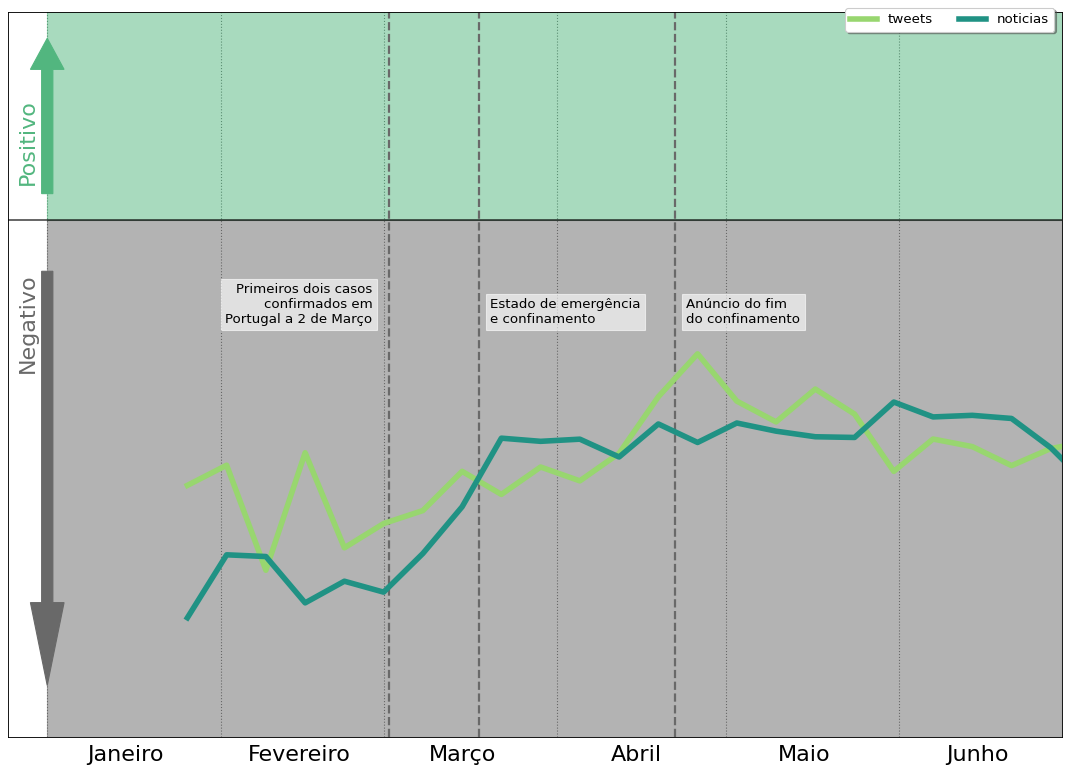

In [469]:
import matplotlib.patches as patches
from datetime import datetime, timedelta
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,1,figsize=(17,12), dpi= 80)
tweets_avg = tweets_temp.groupby(pd.Grouper(key='date', freq='W'))['classification'].agg('mean')
news_avg = news_temp.groupby(pd.Grouper(key='data', freq='W'))['classification'].agg('mean')
ax.plot(tweets_avg.index, tweets_avg.values, color=c[3], linewidth=5, label='tweets')
ax.plot(news_avg.index, news_avg.values, color=c[1], linewidth=5, label='noticias')

start = datetime(2020,1,1)
end = datetime(2020,6,30)
axis_start = datetime(2019,12,25)
arrow_delta = axis_start + timedelta(days=3)

# convert to matplotlib date representation
start_crd = mdates.date2num(start)
end_crd = mdates.date2num(end)
axis_start_crd = mdates.date2num(axis_start)
arrow_delta_crd = mdates.date2num(arrow_delta) - axis_start_crd
width = end_crd - start_crd

ax.set(xlim=(axis_start_crd, end_crd), ylim=(-1, 0.4))
ax.axhline(y=0, color='black', alpha=0.7)

rect_pos = patches.Rectangle((start_crd, 0), width=width, height=1, alpha=0.5, color=c[2])
rect_neg = patches.Rectangle((start_crd, -1), width=width, height=1, alpha=0.5, color=c[0])
arrow_pos = patches.Arrow(x=start_crd, y=0.05, dx=0, dy=0.3, width=10, alpha=1, color=c[2])
arrow_neg = patches.Arrow(x=start_crd, y=-0.1, dx=0, dy=-0.8, width=10, alpha=1, color=c[0])
#arrow = mpatches.Arrow()
ax.add_patch(rect_pos)
ax.add_patch(rect_neg)
ax.add_patch(arrow_pos)
ax.add_patch(arrow_neg)

ax.text(np.mean([axis_start_crd, start_crd]), 0.15,
        'Positivo', color=c[2],
        horizontalalignment='center', verticalalignment='center',
        fontdict={'size':20}, rotation=90)

ax.text(np.mean([axis_start_crd, start_crd]), -0.2,
        'Negativo', color=c[0],
        horizontalalignment='center', verticalalignment='center',
        fontdict={'size':20}, rotation=90)

#ax.tick_params(axis='y', which='both', left=False, labelleft=False)
ax.tick_params(axis='x', which='both', bottom=False, labelsize=20)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
ax.set_xticks(('2020-01-15', '2020-02-15', '2020-03-15', '2020-04-15', '2020-05-15', '2020-06-15'))
ax.set_xticklabels(('Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'))
for pos in ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01']:
    ax.vlines(x=pos, ymin=-1, ymax=0.4, color='black', alpha=0.6, linewidth=1, linestyles='dotted', zorder=1)

ax.legend(loc='center right', fontsize=12, frameon=True,
          bbox_to_anchor=(0.999, 0.99),
          ncol=2, fancybox=True, shadow=True, facecolor='white')

ax.vlines(x='2020-03-02', ymin=-1, ymax=0.4, color=c[0], linewidth=2, linestyles='dashed')
ax.annotate('Primeiros dois casos\nconfirmados em\nPortugal a 2 de Março',
            ('2020-02-28', -0.2),
            size=12, ha='right',
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.6))
ax.vlines(x='2020-03-18', ymin=-1, ymax=0.4, color=c[0], linewidth=2, linestyles='dashed')
ax.annotate('Estado de emergência\ne confinamento',
            ('2020-03-20', -0.2),
            size=12, ha='left',
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.6))
ax.vlines(x='2020-04-22', ymin=-1, ymax=0.4, color=c[0], linewidth=2, linestyles='dashed')
ax.annotate('Anúncio do fim\ndo confinamento',
            ('2020-04-24', -0.2),
            size=12, ha='left',
            bbox=dict(facecolor='white', edgecolor='white', alpha=0.6))
title_font = {'fontsize': 18,
              'fontweight' : 600,
              'horizontalalignment': 'center'}
#plt.title('Sentimento expressado em títulos de notícias e tweets', fontdict=title_font, pad=15)
plt.savefig('sentimento_tempo_sem_titulo.png', dpi=200, bbox_inches='tight')

In [466]:
tweets_avg

date
2020-01-26   -0.513514
2020-02-02   -0.474576
2020-02-09   -0.677419
2020-02-16   -0.450549
2020-02-23   -0.634146
2020-03-01   -0.587253
2020-03-08   -0.562189
2020-03-15   -0.486403
2020-03-22   -0.530989
2020-03-29   -0.478084
2020-04-05   -0.504854
2020-04-12   -0.451643
2020-04-19   -0.342324
2020-04-26   -0.259440
2020-05-03   -0.350835
2020-05-10   -0.390957
2020-05-17   -0.327511
2020-05-24   -0.375839
2020-05-31   -0.486535
2020-06-07   -0.424042
2020-06-14   -0.438669
2020-06-21   -0.475345
2020-06-28   -0.442341
2020-07-05   -0.428571
Freq: W-SUN, Name: classification, dtype: float64